# Module 2: Sentiment Analysis (Benjamin Lukin)

Sentiment analysis model using pandas. The model will be trained on a dataset containing anime reviews from the site MyAnimeList, obtained from https://www.kaggle.com/datasets/stoicstatic/mal-top-10k-anime-details

In [ ]:
import pandas as pd

Checking that there are no immediate issues with the dataset. Some lines in the file could not be read by pandas due to unexpected EOL errors, so we skip any bad lines to move forward smoothly.

In [ ]:
df = pd.read_csv("mal_reviews.csv", on_bad_lines='skip')
df.head()

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,tazillo,"Jan 25, 2010",64 of 64 episodes seen,3464.0,10.0,10.0,9.0,9.0,10.0,10.0,"First of all, I have seen the original FMA and..."
1,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Archaeon,"Nov 15, 2010",64 of 64 episodes seen,1311.0,9.0,8.0,9.0,9.0,9.0,9.0,Adaptations have long been a thorn in the side...
2,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,ChristopherKClaw,"Apr 7, 2015",64 of 64 episodes seen,1113.0,7.0,8.0,8.0,10.0,6.0,7.0,Fullmetal Alchemist: Brotherhood gets an immen...
3,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,literaturenerd,"Apr 25, 2015",64 of 64 episodes seen,704.0,7.0,8.0,8.0,8.0,8.0,8.0,Overview:\nFMA Brotherhood is an anime that ne...
4,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,M0nkeyD_Luffy,"Jul 29, 2015",64 of 64 episodes seen,446.0,5.0,2.0,7.0,7.0,8.0,5.0,Since I couldn't find any legitimate objective...


# Null Values check

Next, we check for any null values and drop them so they don't cause any issues.

In [ ]:
df.isnull().sum()

,0
Anime Rank,0
Anime Title,0
Anime URL,0
Username,1
Review Date,1
Episodes Watched,1
Review Likes,1
Overall Rating,1
Story Rating,1
Animation Rating,1


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Anime Rank,0
Anime Title,0
Anime URL,0
Username,0
Review Date,0
Episodes Watched,0
Review Likes,0
Overall Rating,0
Story Rating,0
Animation Rating,0


Let's have a closer look at the mean values for the ratings.

In [ ]:
df.describe()

,Anime Rank,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating
count,60760.000000,60760.000000,60760.000000,60760.000000,60760.000000,60760.000000,60760.000000,60760.000000
mean,1801.606567,23.751712,7.382900,6.643861,7.451119,7.349687,6.955464,7.220408
std,1172.578709,94.035341,2.158512,2.732446,2.433631,2.458514,2.838504,2.881151
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1033.000000,2.000000,6.000000,5.000000,7.000000,6.000000,6.000000,6.000000
50%,1745.000000,5.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000
75%,2707.000000,14.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000
max,4159.000000,4624.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Honestly, having used MAL for a long time and knowing the kinds of reviews people leave and how low their own mean scores for shows usually are, I'm positively surprised the Overall Rating mean score is that high lol. Story Rating being lower is about what I expected.

# Data Preparation

Next up, we prep the data for training the model. First, we set the boundaries for what we want to count as a "negative", "neutral" or "positive" review.

MAL allows users to give a series a rating of anywhere between 1-10, where 1 means "Appalling", 5 is "Average", 6 is "Fine", 7 is "Good" and 10 is "Masterpiece", with other negative/positive ratings in-between. For this model, I have decided to count anything at or below a 5 as "Negative", as in my experience, people have more negative things to say about a series they rated a 5, compared to positive things. This could be easily changed, however, to include both 5 and 6 as "Neutral". Regardless, anything over a 6 is considered a positive review.

In [ ]:
df['sentiment'] = df['Overall Rating'].apply(lambda x: 'negative' if x <= 5 else 'neutral' if x == 6 else 'positive')
df.head()

,Anime Rank,Anime Title,Anime URL,Username,Review Date,Episodes Watched,Review Likes,Overall Rating,Story Rating,Animation Rating,Sound Rating,Character Rating,Enjoyment Rating,Review,sentiment
0,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,tazillo,"Jan 25, 2010",64 of 64 episodes seen,3464.0,10.0,10.0,9.0,9.0,10.0,10.0,"First of all, I have seen the original FMA and...",positive
1,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Archaeon,"Nov 15, 2010",64 of 64 episodes seen,1311.0,9.0,8.0,9.0,9.0,9.0,9.0,Adaptations have long been a thorn in the side...,positive
2,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,ChristopherKClaw,"Apr 7, 2015",64 of 64 episodes seen,1113.0,7.0,8.0,8.0,10.0,6.0,7.0,Fullmetal Alchemist: Brotherhood gets an immen...,positive
3,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,literaturenerd,"Apr 25, 2015",64 of 64 episodes seen,704.0,7.0,8.0,8.0,8.0,8.0,8.0,Overview:\nFMA Brotherhood is an anime that ne...,positive
4,1,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,M0nkeyD_Luffy,"Jul 29, 2015",64 of 64 episodes seen,446.0,5.0,2.0,7.0,7.0,8.0,5.0,Since I couldn't find any legitimate objective...,negative


Next, we split the dataset into two parts, where one is for training the actual model and the other is for testing it. X contains the actual anime reviews in text form, and y contains the sentiment labels we assigned based on the overall score. The "test_size=0.3" parameter makes it so that 30% of the dataset is reserved for testing purposes.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['Review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,Review
30939,Here's the deal with Major. Despite its length...
33801,This is a better then usual anime I found. (in...
50991,This anime started off really good but ended r...
28442,"Well, this was one roller coaster of a show I ..."
35559,This story really seems to be absurd and I hav...
...,...
54343,A-Channel is your sterotypical slice of life/c...
38158,"Simply put Kuromukuro simply tells a story, an..."
860,"Critics call this series: ""beautiful, imaginat..."
15795,"Ajin's story is clear and easy to follow, with..."


In [ ]:
y_train

,sentiment
30939,positive
33801,positive
50991,neutral
28442,positive
35559,neutral
...,...
54343,neutral
38158,positive
860,positive
15795,positive


# Training the Model

Now we get to actually creating the model and training it. First, we create a machine learning pipeline with two stages: TF-IDF Vectorizer, which converts the review text into a numerical format that the model can work with, and LinearSVC, which is used for classification and is trained on the data created by the Vectorizer.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [ ]:
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

# Evaluation and Visualization

After the model has been trained, it makes predictions on the data that was reserved for testing. We can use the classification_report function to generate a report on the main classification metrics, while the confusion_matrix function creates a visual representation of the model's predictions, which shows us the amount of correct and incorrect predictions made.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
predictions = text_clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.70      0.69      0.70      3354
     neutral       0.30      0.07      0.11      1756
    positive       0.86      0.95      0.91     13118

    accuracy                           0.82     18228
   macro avg       0.62      0.57      0.57     18228
weighted avg       0.78      0.82      0.79     18228



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

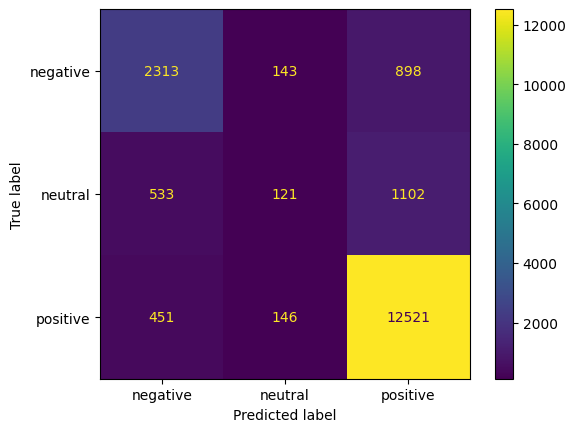

In [ ]:
matrix = confusion_matrix(y_test, predictions)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=text_clf.classes_)
display.plot()
plt.show()

# Making Predictions

Now that the model has been trained, we can test it out by feeding it text that you might find in a review (or even write a full review, if one is so inclined) and see if it can correctly predict whether the text belongs to a (hypothetical) positive, negative or neutral review.

In [ ]:
text_clf.predict(['Disgusting'])

array(['negative'], dtype=object)

In [ ]:
text_clf.predict(['It was alright'])

array(['neutral'], dtype=object)

In [ ]:
text_clf.predict(['Peak'])

array(['positive'], dtype=object)

In [ ]:
text_clf.predict(['While there were some parts I disliked, such as the visuals and sound design, the actual story and characters were really compelling.'])

array(['positive'], dtype=object)

In [ ]:
text_clf.predict(['Anyone who actually likes this show should be put on a list of some kind'])

array(['positive'], dtype=object)